This dataset contains data about lung cancer Mortality and is a comprehensive collection of patient
information, specifically focused on individuals diagnosed with cancer.

In [1]:
import pandas as pd
import numpy as np

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle
from sklearn.preprocessing import OrdinalEncoder



In [2]:
df = pd.read_csv('E:/Projects/Lung_Cancer_Prediction/Notebook/Lung_Cancer.csv')
df.head()






,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [4]:
df.describe()


,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(df.columns)

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')


In [6]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

Not any null values

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['treatment_type'].unique()

array(['Chemotherapy', 'Surgery', 'Combined', 'Radiation'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [10]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

# Complete the data cleaning process

Visualization of data after cleaning 


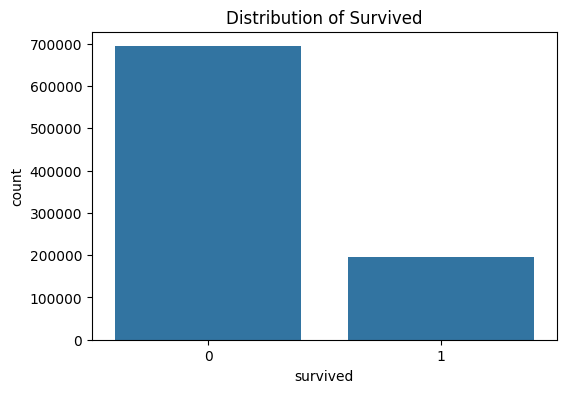

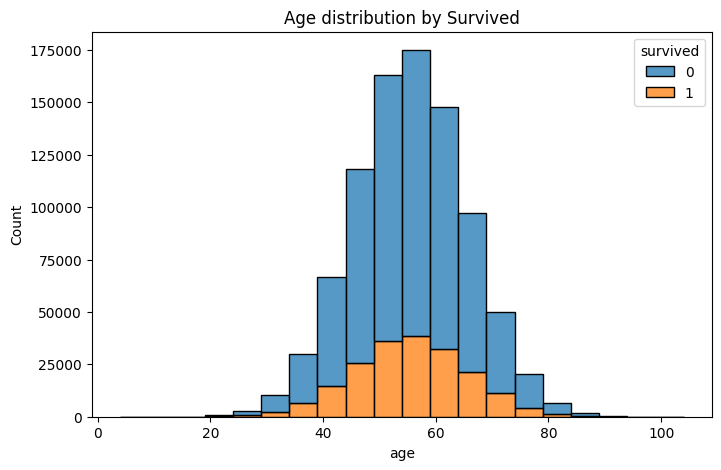

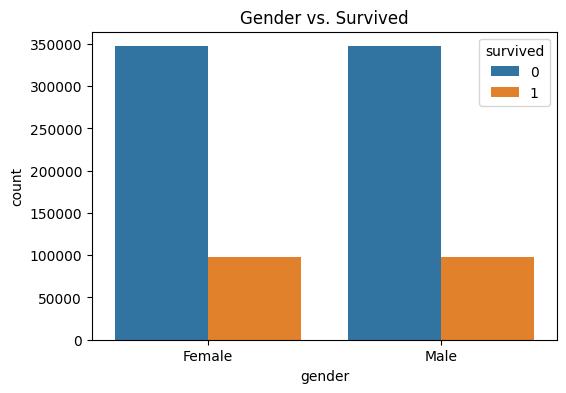

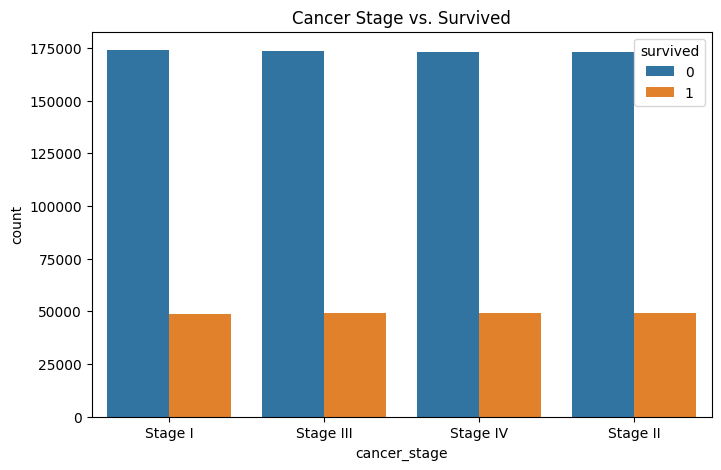

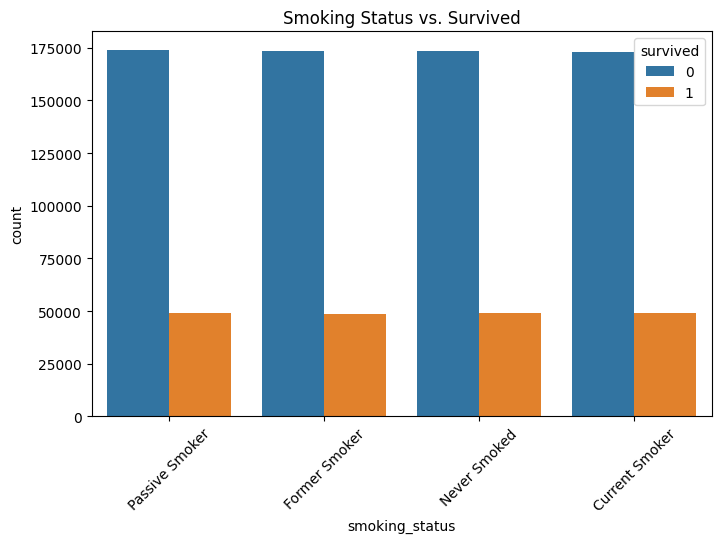

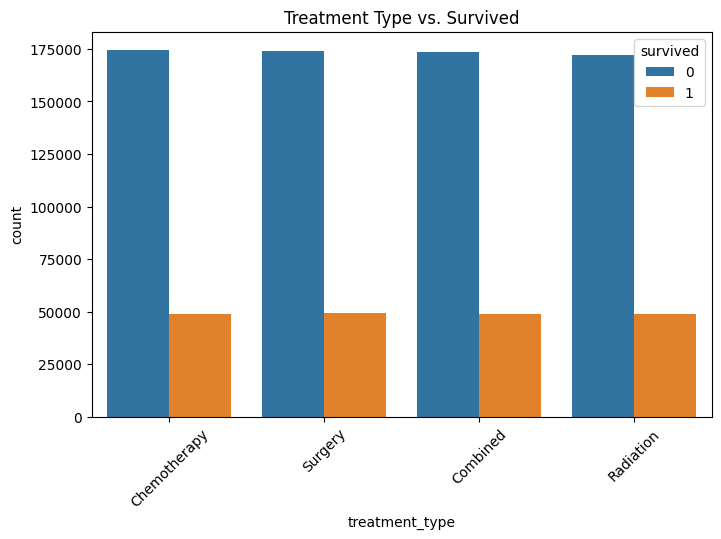

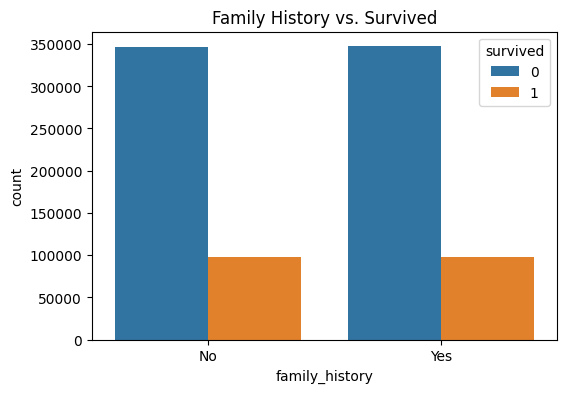

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: show plots inline if in Jupyter
# %matplotlib inline

# ----------------------------
#  Distribution of target
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df)
plt.title('Distribution of Survived')
plt.show()

# ----------------------------
#  Age vs. Survived
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=20)
plt.title('Age distribution by Survived')
plt.show()

# ----------------------------
#  Gender vs. Survived
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='survived', data=df)
plt.title('Gender vs. Survived')
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.show()

# ----------------------------
#  Cancer Stage vs. Survived
plt.figure(figsize=(8,5))
sns.countplot(x='cancer_stage', hue='survived', data=df)
plt.title('Cancer Stage vs. Survived')
plt.show()

# ----------------------------
#  Smoking Status vs. Survived
plt.figure(figsize=(8,5))
sns.countplot(x='smoking_status', hue='survived', data=df)
plt.title('Smoking Status vs. Survived')
plt.xticks(rotation=45)
plt.show()

# ----------------------------
#  Treatment Type vs. Survived
plt.figure(figsize=(8,5))
sns.countplot(x='treatment_type', hue='survived', data=df)
plt.title('Treatment Type vs. Survived')
plt.xticks(rotation=45)
plt.show()

# ----------------------------
#  Family History vs. Survived
plt.figure(figsize=(6,4))
sns.countplot(x='family_history', hue='survived', data=df)
plt.title('Family History vs. Survived')
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.show()










# Now lets convert categorical data into numerical 

In [12]:

df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [13]:
print(df.columns.tolist())


['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']


In [14]:
df.columns = df.columns.str.strip()

In [15]:
df.drop(['id','country','diagnosis_date','cholesterol_level',
         'hypertension','asthma','cirrhosis','other_cancer',
         'end_treatment_date'], axis=1, inplace=True, errors='ignore')

In [16]:
df['gender'] = df['gender'].str.lower().map({'male': 1, 'female': 0})
df['family_history'] = df['family_history'].str.lower().map({'yes': 1, 'no': 0})


In [17]:
X = df.drop('survived', axis=1)  # Keep all columns except 'survived'
y = df['survived']  # Assuming 'survived' is the target variable

In [18]:
X.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,treatment_type
0,64.0,1,Stage I,1,Passive Smoker,29.4,Chemotherapy
1,50.0,0,Stage III,1,Passive Smoker,41.2,Surgery
2,65.0,0,Stage III,1,Former Smoker,44.0,Combined
3,51.0,0,Stage I,0,Passive Smoker,43.0,Chemotherapy
4,37.0,1,Stage I,0,Passive Smoker,19.7,Combined


In [19]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [20]:


# Make sure binary columns are numeric 0/1
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['family_history'] = df['family_history'].map({'Yes': 1, 'No': 0})




In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), ['smoking_status', 'treatment_type']),
    ('ord', OrdinalEncoder(), ['cancer_stage']),
    ('num', StandardScaler(), ['age']),
    ('bin', 'passthrough', ['gender', 'family_history'])
])





# 3️⃣ XGBClassifier with class weight
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    scale_pos_weight=scale,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)




NameError: name 'scale' is not defined

In [ ]:
#  Full pipeline: preprocess ➜ SMOTE ➜ XGB
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),  # encodes categorical
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
        n_estimators=200,
        max_depth=5,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

pipeline.fit(X_train, y_train)

e:\Projects\Lung_Cancer_Prediction\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:52:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['smoking_status',
                                                   'treatment_type']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['cancer_stage']),
                                                 ('num', StandardScaler(),
                                                  ['age']),
                                                 ('bin', 'passthrough',
                                                  ['gender',
                                                   'family_history'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=N...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:

y_pred = pipeline.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Report:\n", classification_report(y_test, y_pred))



 Accuracy: 0.5236573033707865
 Report:
               precision    recall  f1-score   support

           0       0.78      0.54      0.64    138639
           1       0.22      0.47      0.30     39361

    accuracy                           0.52    178000
   macro avg       0.50      0.50      0.47    178000
weighted avg       0.66      0.52      0.56    178000



In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("!! Model saved in Notebook/ folder")




!! Model saved in Notebook/ folder
